In [1]:
import numpy as np
import os
import pandas
import plotly.express as px
from plotly import graph_objs as go

In [2]:
path = os.path.realpath("GivenConnect.ipynb")
dir = os.path.dirname(path)
dir = dir.replace("arbors", "WCandCD")
os.chdir(dir)
%run CalculateWCandCD.ipynb
dir = dir.replace("WCandCD", "arbors")
os.chdir(dir)

In [3]:
def Plot3Doptimal(file):
    Plant =readArborFile(file)
    originalPlant = findMainRootConnections(plant)
    Grange = np.arange(-2,2.1,.1)
    Arange = np.arange(0,1.1,.1)
    front = nx.Graph()
    cds=[]
    wcs=[]
    c =0
    WC = calculateWC(originalPlant)
    CD = calculateCD(originalPlant)
    bestDis = 10**20000
    for G in Grange:
        print(G)
        for a in Arange:
            newplant = optimalArbor(originalPlant, G, a)
            cd =calculateCD(newplant)
            wc = calculateWC(newplant)
            cds.append(cd)
            wcs.append(wc)
            front.add_node(c)
            front._node[c]['coordinate']=(cd,wc)
            front._node[c]['G'] =G
            front._node[c]['alpha'] =a
            c+=1
            dis = np.sqrt(((CD-cd)**2) +((WC-wc)**2))
            if dis < bestDis:
                bestDis = dis
                print("best dis: ",bestDis)
                bestNode = c
    points =[cds,wcs]
    bestNodeArray = [front._node[bestNode]['coordinate'], front._node[bestNode]['G'],front._node[bestNode]['alpha']]
    return(points, front, originalPlant, bestDis,bestNodeArray, CD,WC)
    

-2.0
best dis:  0.3465631125618108
best dis:  0.34508621459890426
-1.9
best dis:  0.22369271116244935
-1.7999999999999998
-1.6999999999999997
-1.5999999999999996
-1.4999999999999996
-1.3999999999999995
-1.2999999999999994
-1.1999999999999993
-1.0999999999999992
-0.9999999999999991
-0.899999999999999
-0.7999999999999989
-0.6999999999999988
-0.5999999999999988
-0.49999999999999867
-0.3999999999999986
-0.2999999999999985
-0.1999999999999984
-0.09999999999999831
1.7763568394002505e-15
0.10000000000000187
0.20000000000000195
0.30000000000000204
0.40000000000000213
0.5000000000000022
0.6000000000000023
0.7000000000000024
0.8000000000000025
0.9000000000000026
1.0000000000000027
1.1000000000000028
1.2000000000000028
1.300000000000003
1.400000000000003
1.500000000000003
1.6000000000000032
1.7000000000000033
1.8000000000000034
1.9000000000000035
2.0000000000000036


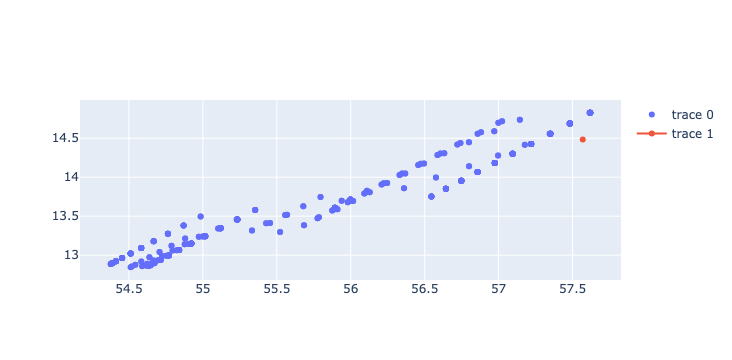

oringal wiring cost:  14.483372159247867  oringal conduction delay:  57.569311953605435
new wiring cost:  14.689683976919763  new conduction delay:  57.48286044745242
original


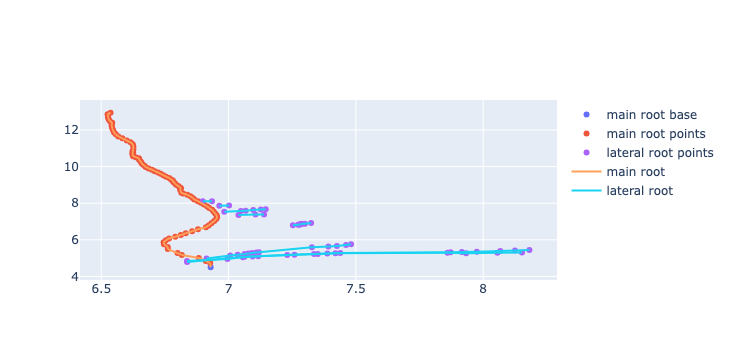

optimal given:  -1.9   0.1


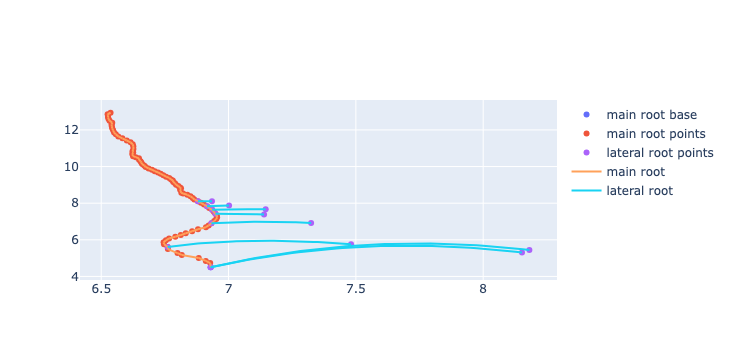

optimal and original super imposed given:  -1.9 ,  0.1


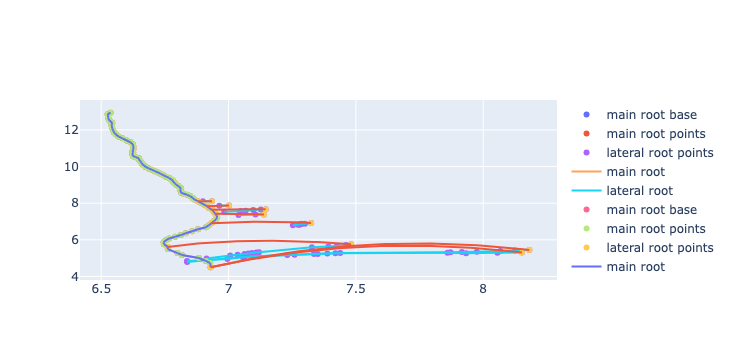

In [6]:
file ='011_1_C_day3.csv'
plant= readArborFile(file)
plant1 = findMainRootConnections(plant)
array = Plot3Doptimal(file)
points =array[0]
front = array[1]
ogPlant =array[2]
bestDis= array[3]
bestNodeArray = array[4]
cd= calculateCD(plant1)
wc= calculateWC(plant1)
fig1 = go.Scatter(x = points[0],y=points[1], mode = 'markers')
trace =go.Scatter(x=[cd],y=[wc])
fig= go.Figure()
fig.add_trace(fig1)
fig.add_trace(trace)
fig.show()
print("oringal wiring cost: ",wc, " oringal conduction delay: ", cd)
print("new wiring cost: ", bestNodeArray[0][1], " new conduction delay: ", bestNodeArray[0][0])
FileDraw(file,bestNodeArray[1],bestNodeArray[2])